In [2]:
import warnings
warnings.filterwarnings("ignore")

# 1. 分詞工具 - jieba

* 精確模式：試圖將句子最精確地切開，適合文本分析。
* 全模式：把句子中所有可以成詞的詞語都掃描出來，速度非常快，但是不能解決歧義。
* 搜尋引擎模式：在精確模式的基礎上，對長詞再次切分，提高召回率，適合用於搜尋引擎分詞。

In [2]:
# !pip3 install jieba

In [3]:
import jieba

seg_list = jieba.cut("哥穿著復古西裝，拿著手杖，彈著魔法樂章，漫步走在莎瑪麗丹。", cut_all=True)
print("[全模式]: " + " ".join(seg_list))#用空格黏起來

seg_list = jieba.cut("哥穿著復古西裝，拿著手杖，彈著魔法樂章，漫步走在莎瑪麗丹。")  # 默認精确模式
print("[精準模式]: " +" ".join(seg_list))

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/rv/r68yq6pn6_g5p1cbz772hbfh0000gn/T/jieba.cache
Loading model cost 0.291 seconds.
Prefix dict has been built successfully.


[全模式]: 哥 穿著 復 古 西 裝 ， 拿 著 手杖 ， 彈 著 魔法 樂 章 ， 漫步 走 在 莎 瑪 麗 丹 。
[精準模式]: 哥 穿著 復 古西裝 ， 拿 著 手杖 ， 彈著 魔法 樂章 ， 漫步 走 在 莎瑪麗丹 。


# 2. 添加自訂義字典

In [4]:
text = "哥穿著復古西裝，拿著手杖，彈著魔法樂章，漫步走在莎瑪麗丹。"

# 全模式
seg_list = jieba.cut(text, cut_all=True)
print("[全模式]: ", " ".join(seg_list))

# 精确模式
seg_list = jieba.cut(text, cut_all=False)
print("[精準模式]: ", " ".join(seg_list))

[全模式]:  哥 穿著 復 古 西 裝 ， 拿 著 手杖 ， 彈 著 魔法 樂 章 ， 漫步 走 在 莎 瑪 麗 丹 。
[精準模式]:  哥 穿著 復 古西裝 ， 拿 著 手杖 ， 彈著 魔法 樂章 ， 漫步 走 在 莎瑪麗丹 。


In [5]:
# Method 1 (單詞) 將字詞加進去(逐一)
jieba.add_word("復古")

# Method 2 (多詞) 多詞用檔案加入
jieba.load_userdict("./data/mydict.txt") #需UTF-8，可以存在此

text = "哥穿著復古西裝，拿著手杖，彈著魔法樂章，漫步走在莎瑪麗丹。"

# 全模式
seg_list = jieba.cut(text, cut_all=True)
print("[全模式]: ", " ".join(seg_list))

# 精确模式
seg_list = jieba.cut(text, cut_all=False)
print("[精準模式]: ", " ".join(seg_list))

[全模式]:  哥 穿著 復古 西裝 ， 拿著 手杖 ， 彈著 魔法 樂 章 ， 漫步 走 在 莎 瑪 麗 丹 。
[精準模式]:  哥 穿著 復古 西裝 ， 拿著 手杖 ， 彈著 魔法 樂章 ， 漫步 走 在 莎瑪麗丹 。


# 3. 關鍵字抽取 (TF-IDF)

In [6]:
import jieba.analyse
#分析前五個重要的單字並取出
seg_list = jieba.cut(text, cut_all=False)
print("分詞結果:", " ".join(seg_list))

# 獲取關鍵字
tags = jieba.analyse.extract_tags(text, topK=5) #extract_tags指定前5
print("Top5 提取關鍵詞結果:", " ".join(tags))

分詞結果: 哥 穿著 復古 西裝 ， 拿著 手杖 ， 彈著 魔法 樂章 ， 漫步 走 在 莎瑪麗丹 。
Top5 提取關鍵詞結果: 穿著 復古 西裝 拿著 彈著


In [7]:
import pandas as pd

In [8]:
tags = jieba.analyse.extract_tags(text, topK=5, withWeight=True)

pd.DataFrame(tags, columns = ['words', 'weight'])

,words,weight
0,穿著,1.210892
1,復古,1.195477
2,西裝,1.195477
3,拿著,1.195477
4,彈著,1.195477


# 4. 詞性標註

In [9]:
import jieba.posseg as pseg
 
words = pseg.cut("哥穿著復古西裝，拿著手杖，彈著魔法樂章，漫步走在莎瑪麗丹。")

pd.DataFrame(words, columns = ['words', 'flags'])

,words,flags
0,哥,n
1,穿著,n
2,復古,x
3,西裝,x
4,，,x
5,拿著,x
6,手杖,n
7,，,x
8,彈著,x
9,魔法,n


* 參考資料：https://www.cnblogs.com/chenbjin/p/4341930.html

|代碼|名稱|
| --- | --- |
|Ag|形語素|
|a|形容詞|
|ad|副形詞|
|an|名形詞|
|b|區別詞|
|c|連詞|
|Dg|副語素|
|d|副詞|
|e|嘆詞|
|f|方位詞|
|g|語素|
|h|前接成分|
|i|成語|
|j|簡稱略語|
|k|後接成分|
|l|習用語|
|m|數詞|
|Ng|名語素|
|n|名詞|
|nr|人名|
|ns|地名|
|nt|機構團體|
|nz|其他專名|
|o|擬聲詞|
|p|介詞|
|q|量詞|
|r|代詞|
|s|處所詞|
|Tg|時語素|
|t|時間詞|
|u|助詞|
|Vg|動語素|
|v|動詞|
|vd|副動詞|
|vn|名動詞|
|w|標點符號|
|x|非語素字|
|y|語氣詞|
|z|狀態詞|

# 5. 範例

In [23]:
# !pip3 uninstall -y pillow
# !pip3 uninstall -y scipy

In [24]:
# !pip3 install pillow
# !pip3 install scipy==1.1.0

In [36]:
# !pip3 install wordcloud

Defaulting to user installation because normal site-packages is not writeable


In [10]:
import PIL; 
print('PIL version:' + PIL.__version__) # 5.2.0
# import scipy; print('scipy version:' + scipy.__version__) # 1.1.0

PIL version:9.5.0


In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [13]:
jay_ori = pd.read_csv('./簡轉繁/jay_song_tw.csv', 
                  sep = ",", encoding = "UTF-8")
jay = jay_ori[['song', 'lyric']]
jay

,song,lyric
0,可愛女人,作詞：徐若瑄\n\n作曲：周杰倫\n\n編曲：周杰倫\n\n想要有直升機 想要和妳飛到宇宙去...
1,完美主義,作詞：方文山\n\n作曲：周杰倫\n\n編曲：洪敬堯\n\n如果說懷疑 可以造句 如果說分離...
2,星晴,作詞：周杰倫\n\n作曲：周杰倫\n\n編曲：洪敬堯\n\n一步兩步三步四步 望著天\n\n...
3,娘子,作詞：方文山\n\n作曲：周杰倫\n\n編曲：周杰倫\n\n娘子 娘子卻依舊每日折一枝楊柳\...
4,鬥牛,作詞：方文山\n\n作曲：周杰倫\n\n編曲：洪敬堯\n\n要不要挑一下 啊 挑一下丫 隨便...
...,...,...
175,床邊故事,作詞：方文山\n\n作曲：周杰倫\n\n編曲：黃雨勳\n\n從前從前有隻貓頭鷹 牠站在屋頂\...
176,愛情廢柴,作詞：周杰倫\n\n作曲：周杰倫\n\n編曲：黃雨勳\n\n聖誕節 剩下單人的剩單節\n\n...
177,英雄,作詞：周杰倫\n\n作曲：周杰倫\n\n編曲：黃雨勳\n\n人生不是一個人的遊戲\n\n一起...
178,說走就走,作詞：方文山\n\n作曲：周杰倫\n\n編曲：黃雨勳\n\n伸出手 搭便車 唱著歌 彈著斑鳩...


## 文字清整

In [14]:
import jieba
import jieba.analyse
# 只取中文
import re
jay['lyric']= jay['lyric'].str.replace(r'([^\u4e00-\u9fa5]+)','', regex=True)

# 加入自定義字典
jieba.load_userdict("./data/mydict.txt") #需UTF-8，可以存在此

# 加入stop words
def stopwordlist():
    stopwords = [line.strip() for line in open('./data/stop_words.txt',encoding='UTF-8').readlines()]
    return stopwords
stopwords = stopwordlist()

# 斷詞並同時去除stop words
jay['lyric_cut'] = jay['lyric'].astype(str).apply(lambda x : [i for i in jieba.cut(x) if i not in stopwords])

# 擷取關鍵字TF-IDF (top 15)
jay['key_word'] = jay['lyric_cut'].astype(str).apply(lambda x : [i for i in jieba.analyse.extract_tags(x, topK=15)])

In [15]:
all_song = []
for i in range(len(jay)):
    tmp = jay['key_word'][i]
    all_song.extend(tmp)

In [16]:
# 刪除字數小於2個字
all_song_wordcloud = [word for word in all_song if len(word) >= 2]

In [17]:
all_song_wordcloud

['女人',
 '面紅',
 '感動',
 '瘋狂',
 '心疼',
 '溫柔',
 '壞壞',
 '透明',
 '漂亮',
 '想想',
 '感謝',
 '地心引力',
 '融化',
 '飛到',
 '銀河裡',
 '主義',
 '太徹底',
 '完美',
 '連恨',
 '懷疑',
 '分離',
 '翻譯',
 '將我',
 '封閉',
 '然後在',
 '然後將',
 '溫習',
 '愛上',
 '那場',
 '悲劇',
 '兩步',
 '著天',
 '一顆',
 '兩顆',
 '三顆',
 '四顆',
 '連成線',
 '四步',
 '三步',
 '星星',
 '帶領',
 '環繞',
 '牽手',
 '許下',
 '心願',
 '娘子',
 '依舊',
 '楊柳',
 '溪邊',
 '小村',
 '妳在',
 '一枝',
 '默默',
 '每日',
 '一壺',
 '熱粥',
 '幾斤',
 '兩銀夠',
 '沙掠過',
 '客棧',
 '看著',
 '怎麼面',
 '開球',
 '滿腔',
 '很久別',
 '我別',
 '發抖',
 '你給',
 '頭有',
 '醫藥箱',
 '別怪',
 '停留',
 '籃下',
 '怒火',
 '抬起',
 '黑色幽默',
 '考倒',
 '想通',
 '腦袋',
 '隨便',
 '眼淚',
 '當作',
 '敗給',
 '拆穿',
 '猜透',
 '看透',
 '玩笑',
 '不住',
 '難過',
 '因為悶',
 '漢堡',
 '伊斯坦堡',
 '不著',
 '願望',
 '祈禱',
 '但家',
 '心跳',
 '走過',
 '我來',
 '童話',
 '地尋找',
 '個大早',
 '夢裡',
 '潮起',
 '迷了路',
 '印地安',
 '老斑',
 '毛不多',
 '腿短',
 '灰狼',
 '決鬥',
 '幾天',
 '活腦袋',
 '獵物',
 '難過',
 '蜥蝪',
 '橫著',
 '像貓',
 '烏鴉',
 '叢旁',
 '不覺',
 '愛情',
 '知後覺',
 '太快',
 '經離開',
 '這節',
 '不知',
 '風離',
 '不開',
 '暴風圈',
 '無處',
 '又過',
 '秋後知後覺',
 '離開',
 '危險',
 '沒用',
 '感動',
 '時間',
 '畫面'

## 6.1 Word cloud

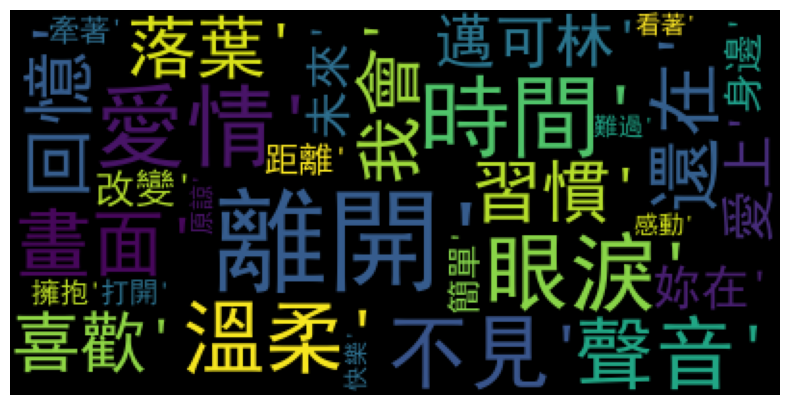

In [19]:
wc = WordCloud(background_color='black',       #設置背景顏色
               font_path='./data/SimHei.ttf',  #設置字體格式，顯示中文
               max_words=30)                   #設置最大實現的字數
wc.generate(str(all_song_wordcloud))

plt.figure(figsize=(10,5))
plt.imshow(wc)
plt.axis("off")
plt.show()

wc.to_file('word_cloud.jpg')

## 6.2 關鍵字 頻次表

In [20]:
corpus = pd.DataFrame(all_song_wordcloud, columns=['word'])
corpus['cnt'] = 1

corpus_cnt = corpus.groupby(['word'])\
                   .agg({'cnt': 'count'})\
                   .sort_values('cnt', ascending=False)\
                   .reset_index(level=0)
corpus_cnt.head(10)

,word,cnt
0,離開,17
1,時間,10
2,愛情,10
3,眼淚,9
4,溫柔,8
5,聲音,8
6,不見,8
7,還在,7
8,畫面,7
9,回憶,7


## 6.3 Final df

In [21]:
jay.isna().sum()

song          0
lyric        26
lyric_cut     0
key_word      0
dtype: int64

In [22]:
jay = jay.dropna(axis=0,how='any')
jay.reset_index(inplace=True, drop=False)

In [23]:
jay

,index,song,lyric,lyric_cut,key_word
0,0,可愛女人,作詞徐若瑄作曲周杰倫編曲周杰倫想要有直升機想要和妳飛到宇宙去想要和妳融化在一起融化在銀河裡我...,"[直升, 機, 妳, 飛到, 宇宙, 妳, 融化, 融化, 銀河裡, 想想, 想想, 妳, ...","[女人, 面紅, 感動, 瘋狂, 心疼, 溫柔, 壞壞, 透明, 漂亮, 想想, 感謝, 地..."
1,1,完美主義,作詞方文山作曲周杰倫編曲洪敬堯如果說懷疑可以造句如果說分離能夠翻譯如果這一切真的可以我想要將...,"[懷疑, 造句, 分離, 翻譯, 將我, 寂寞, 封閉, 然後在, 日期, 然後將, 慢慢,...","[主義, 太徹底, 完美, 連恨, 懷疑, 分離, 翻譯, 將我, 封閉, 然後在, 然後將..."
2,2,星晴,作詞周杰倫作曲周杰倫編曲洪敬堯一步兩步三步四步望著天看星星一顆兩顆三顆四顆連成線一步兩步三步...,"[兩步, 三步, 四步, 著天, 星星, 一顆, 兩顆, 三顆, 四顆, 連成線, 兩步, ...","[兩步, 著天, 一顆, 兩顆, 三顆, 四顆, 連成線, 四步, 三步, 星星, 帶領, ..."
3,3,娘子,作詞方文山作曲周杰倫編曲周杰倫娘子娘子卻依舊每日折一枝楊柳妳在那裡在小村外的溪邊河口默默等著...,"[娘子, 娘子, 依舊, 每日, 折, 一枝, 楊柳, 妳在, 小村, 外, 溪邊, 河口,...","[娘子, 依舊, 楊柳, 溪邊, 小村, 妳在, 一枝, 默默, 每日, 一壺, 熱粥, 幾..."
4,4,鬥牛,作詞方文山作曲周杰倫編曲洪敬堯要不要挑一下啊挑一下丫隨便阿有什麼不妥有話就直說別窩在角落不爽...,"[挑, 挑, 丫隨便, 阿有, 不妥, 有話, 直, 窩, 角落, 不爽, 反駁, 跩, 懂...","[看著, 怎麼面, 開球, 滿腔, 很久別, 我別, 發抖, 你給, 頭有, 醫藥箱, 別怪..."
...,...,...,...,...,...
149,175,床邊故事,作詞方文山作曲周杰倫編曲黃雨勳從前從前有隻貓頭鷹牠站在屋頂屋頂後面一片森林森林很安靜安靜的鋼...,"[從前, 前, 隻, 貓頭鷹, 牠, 站, 屋頂, 屋, 頂後面, 森林, 森林, 很安靜安...","[上燈, 敲敲, 天黑, 翻頁, 躲著, 童年, 蘋果, 數後關, 三二一入, 夢境, 繽紛..."
150,176,愛情廢柴,作詞周杰倫作曲周杰倫編曲黃雨勳聖誕節剩下單人的剩單節過條街最好又給我下起雪這麼衰這麼剛好這麼...,"[聖誕節, 剩下, 單人, 剩單, 節過, 條街, 又給, 起雪, 衰, 狼狽要, 拍, 成...","[封麥, 愛哭個, 曲終, 人散, 我承認, 愛情裡, 離開, 依賴, 還在, 耍賴, 眼淚..."
151,177,英雄,作詞周杰倫作曲周杰倫編曲黃雨勳人生不是一個人的遊戲一起奮鬥一起超越一起殺吧兄弟好戰好勝戰勝逆...,"[人生, 遊戲, 奮鬥, 超越, 殺, 兄弟, 好戰, 勝戰勝, 逆命, 管它, 天, 賦夠...","[雙殺, 插眼, 傳送擊, 三殺, 勝利, 最後讓, 跳躍你閉, 著眼, 轉完會, 閉上, ..."
152,178,說走就走,作詞方文山作曲周杰倫編曲黃雨勳伸出手搭便車唱著歌彈著斑鳩不遠處沙漠我們才剛剛經過路兩旁是單調...,"[伸出手, 搭便, 車唱, 著歌, 彈著, 斑, 鳩, 不遠處, 沙漠, 剛剛, 路, 兩旁...","[星星, 天上, 證明, 輕該, 瀟灑, 我數, 無邊, 風景風, 呼嘯, 聲音, 守護, ..."
